In [ ]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window
import statsmodels.api as sm


file = r'/gdrive/My Drive/python3/python 3A missing value/modify.csv'
Data = pd.read_csv(file)  #creates a dataframe

print(Data.shape)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
(12132, 25)


In [ ]:
#Date Manipulation
Data['STime'].dtype
Data['STime'] = pd.to_datetime(Data.STime)
Data['ETime']  = pd.to_datetime(Data.ETime)
Data['CTime'] = Data['ETime'] - Data['STime']
Data.drop(['Unnamed: 0', 'STime'], axis=1, inplace=True)
Data.drop(['ETime'], axis=1, inplace=True)

In [ ]:
list(Data.columns.values.tolist())

['ID',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'Quote',
 'Sold',
 'Metric1',
 'CTime']

SALE COUNT: MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['ID',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8','Metric1'] 
X = Data[cols]
y = Data['Sold']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Selected features: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Metric1']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Optimal number of features: 10
Selected features: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'Metric1']


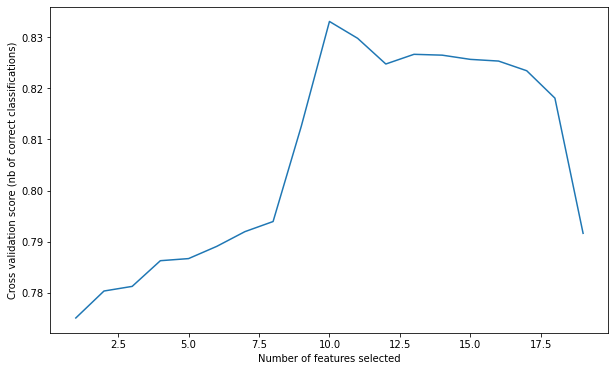

In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
#declare the independent variables, including the intercept
#create the LogR model
#fit the model
#explicitly create a placeholder for y-intercept: b0
Data['int']=1
Data.head()
independentVar= [
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'int','Metric1']
model1= sm.Logit(Data['Sold'], Data[independentVar])


answer= model1.fit()

Optimization terminated successfully.
         Current function value: 0.419753
         Iterations 6


In [ ]:
#summarize the model
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                12132
Model:                          Logit   Df Residuals:                    12113
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:                  0.2099
Time:                        07:55:43   Log-Likelihood:                -5092.4
converged:                       True   LL-Null:                       -6445.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C1            -2.2577      0.105    -21.533      0.000      -2.463      -2.052
C2            -2.4440      0.094    -25.927      0.000      -2.629      -2.259
C3            -1.9109      0.235     -8.121      0.000      -2.372      -1.450
C4            -2.6519      0.109    -24.299      0.000      -2.866      -2.438
C5            -2.2317      0.100    -22.423      0.000      -2.427      -2.037
C6            -2.1893      0.109    -20.038      0.000      -2.403      -1.975
C7            -2.2026      0.125    -17.596      0.000      -2.448      -1.957
C8            -2.0609      0.212     -9.736      0.000      -2.476      -1.646
C9            -2.0901      0.126    -16.603      0.000      -2.337      -1.843
P1            -0.0121      0.053     -0.229      0.819      -0.116       0.092
P2            -0.0095      0.006     -1.694      0.090      -0.021       0.001
P3             0.0423      0.006      7.008      0.000       0.031       0.054
P4            -0.1832      0.122     -1.499      0.134      -0.423       0.056
P5            -0.0333      0.014     -2.397      0.017      -0.061      -0.006
P6             0.0189      0.015      1.226      0.220      -0.011       0.049
P7             0.0005      0.005      0.083      0.934      -0.010       0.011
P8             0.0515      0.016      3.275      0.001       0.021       0.082
int           -2.0665      0.043    -47.740      0.000      -2.151      -1.982
Metric1       23.3356      0.711     32.814      0.000      21.942      24.729
==============================================================================
"""

Quote Count : Model

In [ ]:
#declare the independent variables, including the intercept
#create the LogR model
#fit the model
#explicitly create a placeholder for y-intercept: b0
Data['int']=1
Data.head()
independentVar= [
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'Metric1',
 'C9',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'int']
model1= sm.Logit(Data['Quote'], Data[independentVar])


answer= model1.fit()

Optimization terminated successfully.
         Current function value: 0.577287
         Iterations 6


In [ ]:
#summarize the model
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Quote   No. Observations:                12132
Model:                          Logit   Df Residuals:                    12113
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:                  0.1663
Time:                        07:59:45   Log-Likelihood:                -7003.7
converged:                       True   LL-Null:                       -8400.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C1             0.4186      0.101      4.154      0.000       0.221       0.616
C2             0.9431      0.085     11.111      0.000       0.777       1.109
C3             0.8866      0.263      3.370      0.001       0.371       1.402
C4             0.2771      0.100      2.766      0.006       0.081       0.473
C5             0.5466      0.093      5.853      0.000       0.364       0.730
C6             0.1956      0.107      1.824      0.068      -0.015       0.406
C7             0.6502      0.126      5.151      0.000       0.403       0.898
C8             0.0994      0.208      0.478      0.632      -0.308       0.507
Metric1       -0.3593      0.720     -0.499      0.618      -1.770       1.052
C9             0.3648      0.119      3.076      0.002       0.132       0.597
P1             0.1969      0.050      3.908      0.000       0.098       0.296
P2            -0.0138      0.005     -2.519      0.012      -0.025      -0.003
P3             0.0746      0.006     12.121      0.000       0.063       0.087
P4             0.1174      0.098      1.193      0.233      -0.076       0.310
P5             0.0041      0.013      0.313      0.754      -0.022       0.030
P6             0.0412      0.016      2.608      0.009       0.010       0.072
P7             0.0039      0.006      0.696      0.486      -0.007       0.015
P8             0.0912      0.016      5.700      0.000       0.060       0.123
int           -1.1670      0.035    -33.303      0.000      -1.236      -1.098
==============================================================================
"""

XGBRegressor Feature Scoring

[08:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.04205
Feature: 1, Score: 0.05389
Feature: 2, Score: 0.01032
Feature: 3, Score: 0.04976
Feature: 4, Score: 0.03666
Feature: 5, Score: 0.02397
Feature: 6, Score: 0.03962
Feature: 7, Score: 0.02970
Feature: 8, Score: 0.02091
Feature: 9, Score: 0.02109
Feature: 10, Score: 0.04412
Feature: 11, Score: 0.36216
Feature: 12, Score: 0.01330
Feature: 13, Score: 0.02931
Feature: 14, Score: 0.02945
Feature: 15, Score: 0.03684
Feature: 16, Score: 0.09976
Feature: 17, Score: 0.05710


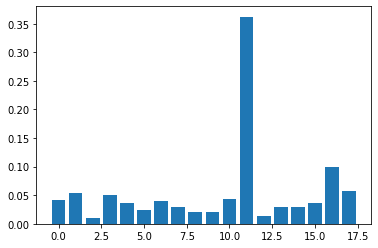

In [ ]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
df6 = Data[[ 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'Metric1','Sold']]

 
X = df6.drop('Sold', axis=1)
Y = df6['Sold']
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [47]:
# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = Data[[
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'Metric1']]
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    variables       VIF
0          C1       inf
1          C2       inf
2          C3       inf
3          C4       inf
4          C5       inf
5          C6       inf
6          C7       inf
7          C8       inf
8          C9       inf
9         C10       inf
10         P1  1.255334
11         P2  1.786703
12         P3  3.160014
13         P4  1.044108
14         P5  1.757934
15         P6  1.487686
16         P7  2.784735
17         P8  2.155163
18    Metric1       inf
19  Intercept  2.412433
